In [31]:
import numpy as np
from sklearn.datasets import load_breast_cancer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [32]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Create a model
model = KNeighborsClassifier()

In [35]:
# Evaluate the model on the training set
train_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Training Accuracy: {np.mean(train_accuracy):.4f}')

Training Accuracy: 0.9231


In [36]:
# Evaluate the model on the test set
test_accuracy = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')
print(f'Test Accuracy: {np.mean(test_accuracy):.4f}')

Test Accuracy: 0.9561


#### using cross_validate

In [37]:
from sklearn.model_selection import cross_validate

In [38]:
model = KNeighborsClassifier()

In [25]:
# Define metrics for evaluation (including training accuracy)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

In [39]:
# Perform cross-validation with training accuracy
cv_results = cross_validate(model, 
                            X, 
                            y, 
                            cv                = 5, 
                            scoring           = scoring_metrics, 
                            return_train_score= True)


In [40]:
cv_results

{'fit_time': array([0.00100017, 0.00307846, 0.        , 0.        , 0.00400782]),
 'score_time': array([0.05949736, 0.01348996, 0.00756025, 0.00589705, 0.01003695]),
 'test_accuracy': array([0.88596491, 0.93859649, 0.93859649, 0.94736842, 0.92920354]),
 'train_accuracy': array([0.95164835, 0.95164835, 0.94725275, 0.93846154, 0.94736842]),
 'test_precision': array([0.8625    , 0.93243243, 0.94520548, 0.94594595, 0.95652174]),
 'train_precision': array([0.94897959, 0.94295302, 0.94237288, 0.93856655, 0.94557823]),
 'test_recall': array([0.97183099, 0.97183099, 0.95833333, 0.97222222, 0.92957746]),
 'train_recall': array([0.97552448, 0.98251748, 0.9754386 , 0.96491228, 0.97202797]),
 'test_f1': array([0.91390728, 0.95172414, 0.95172414, 0.95890411, 0.94285714]),
 'train_f1': array([0.96206897, 0.96232877, 0.95862069, 0.95155709, 0.95862069])}

In [28]:
import matplotlib.pyplot as plt

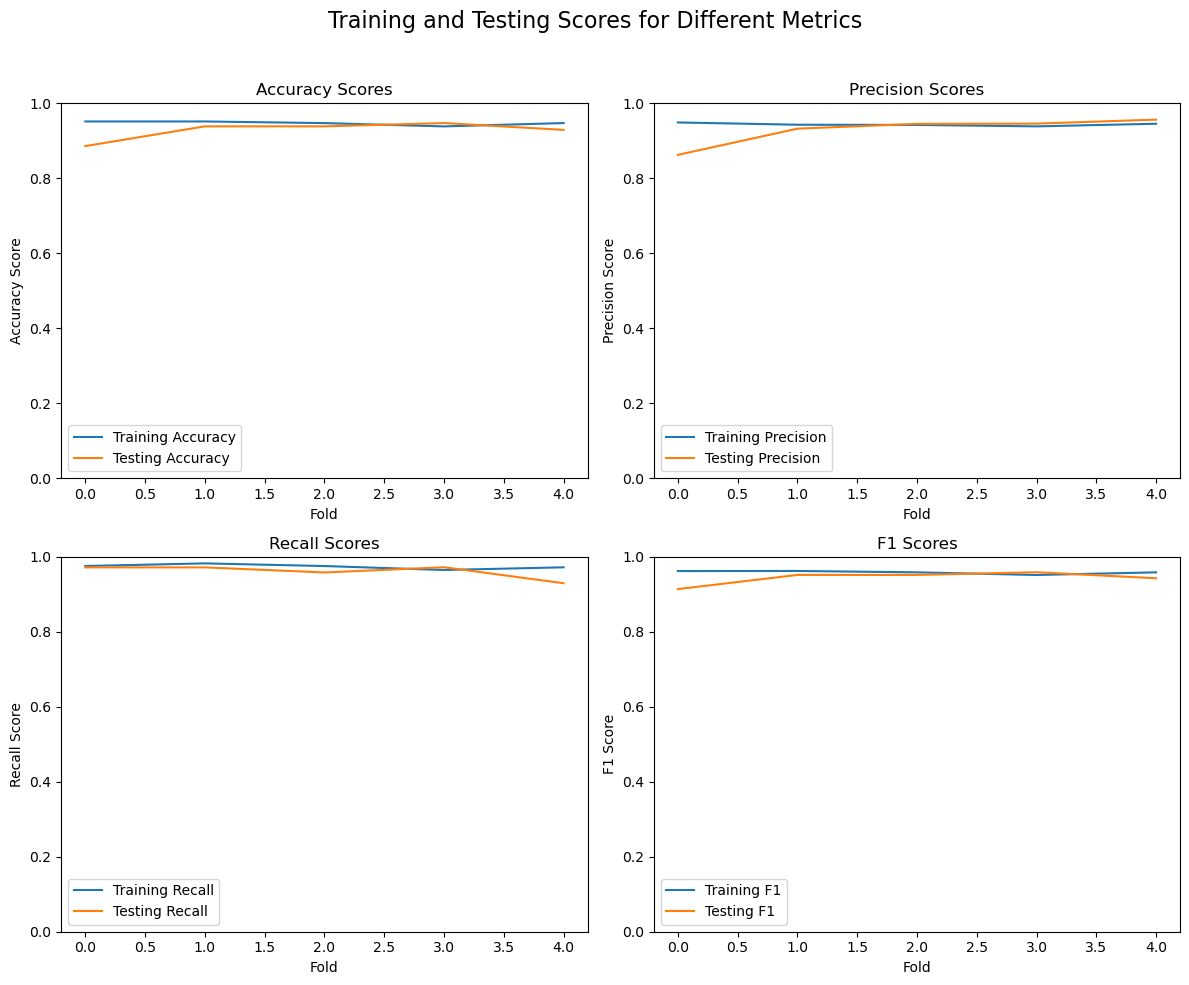

In [41]:
# Plot the metric scores
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Training and Testing Scores for Different Metrics', fontsize=16)

for i, metric in enumerate(scoring_metrics):
    row, col = divmod(i, 2)
    
    train_metric_key = f'train_{metric}'
    test_metric_key  = f'test_{metric}'
    
    axes[row, col].plot(cv_results[train_metric_key], label=f'Training {metric.capitalize()}')
    axes[row, col].plot(cv_results[test_metric_key],  label=f'Testing {metric.capitalize()}')
    
    axes[row, col].set_ylim([0, 1])
    
    axes[row, col].set_title(f'{metric.capitalize()} Scores')
    axes[row, col].set_xlabel('Fold')
    axes[row, col].set_ylabel(f'{metric.capitalize()} Score')
    axes[row, col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()